# 1901042697 Muhammed Bedir ULUCAY

In [16]:
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import time
import math
import random 
import seaborn as sns
import operator
from matplotlib import pyplot as plt
# import scikitplot as skplt
# pip install scikit-plot
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report, precision_score, recall_score, r2_score, mean_squared_error, ConfusionMatrixDisplay
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import _tree
from sklearn import svm, metrics
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

### Clean data is so important If you want to a good ml model
### You need quantity of data also these data needs to have quality

# PART 1

In [17]:
## Manhattan Distance Method
def manhattanDistance(a, b, size):
    distance = 0
    for i in range(size):
        distance += math.fabs(a[i] - b[i])

    return distance

## Euclidian Distance Method
def euclidDistance(a, b, size):
    distance = 0
    for i in range(size):
        distance += pow(a[i] - b[i], 2)

    return math.sqrt(distance)

def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    plt.rcParams["figure.figsize"] = [12,9]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

def report_performance(y_test, y_pred):
    report = classification_report(y_test, y_pred)
    print(report)
  
def display_accuracy(y_test, y_pred):
    print("Accuracy : %",accuracy_score(y_test, y_pred) * 100)

def display_roc(y_test, y_pred):
  print('Original Model')
  fpr, tpr, thres = metrics.roc_curve(y_test,  y_pred)
  #create ROC curve
  plt.plot(fpr,tpr)
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
  print(thres)

In [18]:
"""
X_train : input data y_train : output data x_test : test data
dist_method : euclidDistance or manhattanDistance
return : k# neighbors as : (X_train, y_train, distance)

"""
def getNeighbors(X_train, y_train, x_test, k, dist_method):
    all_dist = []
    test_len = len(x_test)
    for i in range(len(X_train)):
        dist = dist_method(x_test, X_train[i], test_len)
        all_dist.append((X_train[i], y_train[i], dist))

    all_dist.sort(key=operator.itemgetter(2))
    return all_dist[:k]


# pre-processing on data - feature scaling (normalization method)
def PreProcess(x_train, x_test):
    scx = StandardScaler()
    x_train = scx.fit_transform(x_train.astype(float))
    x_test = scx.transform(x_test.astype(float))
    
    return x_train, x_test


# Needed for classifying
def maxCountedClass(neighbors, class_index):
    votes = {}
    for i in range(len(neighbors)):
        result = neighbors[i][class_index]
        if result in votes:
            votes[result] += 1
        else:
            votes[result] = 1
    sortedVotes = sorted(votes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]


def knn_predict(X_train, y_train, X_test, k, distance_metric):
    y_pred = []
    for x in X_test:
        distances = []
        for i, x_train in enumerate(X_train):
            distance = distance_metric(x, x_train)
            distances.append((distance, y_train[i]))
        distances.sort()
        neighbors = distances[:k]
        counts = {}
        for neighbor in neighbors:
            if neighbor[1] in counts:
                counts[neighbor[1]] += 1
            else:
                counts[neighbor[1]] = 1
        sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
        y_pred.append(sorted_counts[0][0])
    return y_pred


## KNN Classifier
"""
x_train : input data
y_train : output data
x_test : test data
dist_method : euclidDistance or manhattanDistance
"""
def KNNClassify(x_train, y_train, x_test, k=4, method='euclidean'):

    dist_method = euclidDistance if method == 'euclidean' else manhattanDistance

    knn = []
    for i in range(len(x_test)):
        neighbors = getNeighbors(x_train, y_train, x_test[i], k, dist_method)
        knn.append(maxCountedClass(neighbors, 1))
        
    return np.array(knn)

In [19]:
audit_risk = pd.read_csv("audit_data/audit_risk.csv")
trial = pd.read_csv("audit_data/trial.csv")

trial.columns = ['Sector_score','LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',  'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk_trial' ]
trial['Score_A'] = trial['Score_A']/10
trial['Score_B'] = trial['Score_B']/10
merged_df = pd.merge(audit_risk, trial, how='outer', on = ['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B', 'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'])

df = merged_df.drop(['Risk_trial', 'Detection_Risk', 'Risk_F'], axis = 1)
df['Money_Value'] = df['Money_Value'].fillna(df['Money_Value'].median())
df = df[(df.LOCATION_ID != 'LOHARU')]
df = df[(df.LOCATION_ID != 'NUH')]
df = df[(df.LOCATION_ID != 'SAFIDON')]
df = df.astype(float)
df = df.drop_duplicates(keep = 'first')
df = df[['Risk_A', 'Risk_B', 'Risk_C', 'Risk_D','RiSk_E', 'Prob', 'Score', 'CONTROL_RISK', 'Audit_Risk', 'Risk', 'MONEY_Marks', 'Loss']]
audit_class_df = df.drop("Audit_Risk", axis = 1)
audit_class_df.info()
audit_class_df.to_csv("audit_data/audit_clean_data.csv", index=False)
print("Updated number of rows in the dataset: ",len(df))


<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 0 to 809
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Risk_A        760 non-null    float64
 1   Risk_B        760 non-null    float64
 2   Risk_C        760 non-null    float64
 3   Risk_D        760 non-null    float64
 4   RiSk_E        760 non-null    float64
 5   Prob          760 non-null    float64
 6   Score         760 non-null    float64
 7   CONTROL_RISK  760 non-null    float64
 8   Risk          760 non-null    float64
 9   MONEY_Marks   760 non-null    float64
 10  Loss          760 non-null    float64
dtypes: float64(11)
memory usage: 71.2 KB
Updated number of rows in the dataset:  760


manhattan_distance
Accuracy : % 96.9298245614035
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       136
         1.0       1.00      0.92      0.96        92

    accuracy                           0.97       228
   macro avg       0.98      0.96      0.97       228
weighted avg       0.97      0.97      0.97       228

[[136   0]
 [  7  85]]


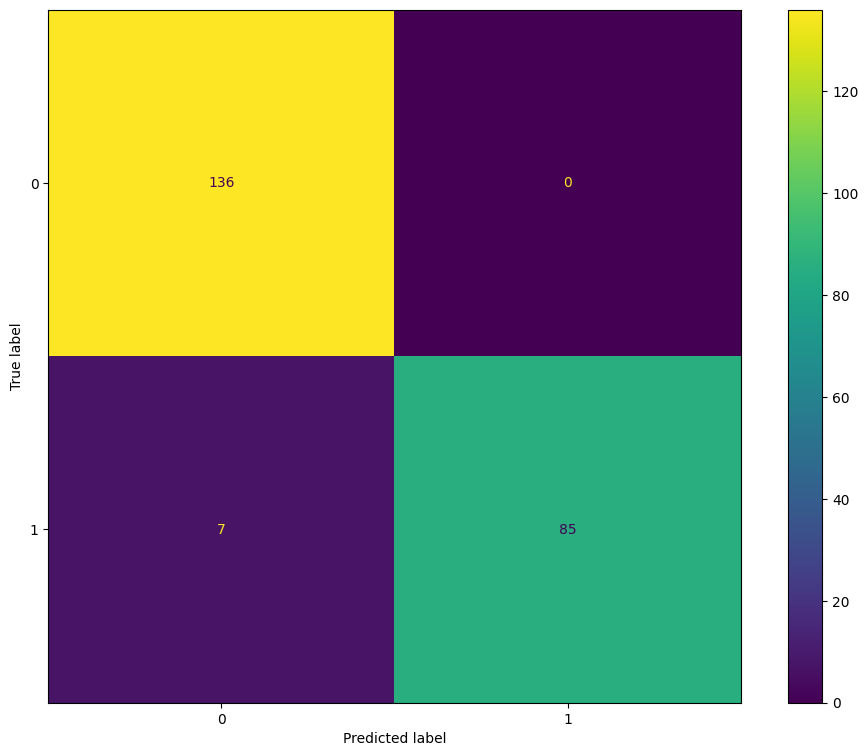

euclidean_distance
Accuracy : % 96.9298245614035
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       136
         1.0       1.00      0.92      0.96        92

    accuracy                           0.97       228
   macro avg       0.98      0.96      0.97       228
weighted avg       0.97      0.97      0.97       228

[[136   0]
 [  7  85]]


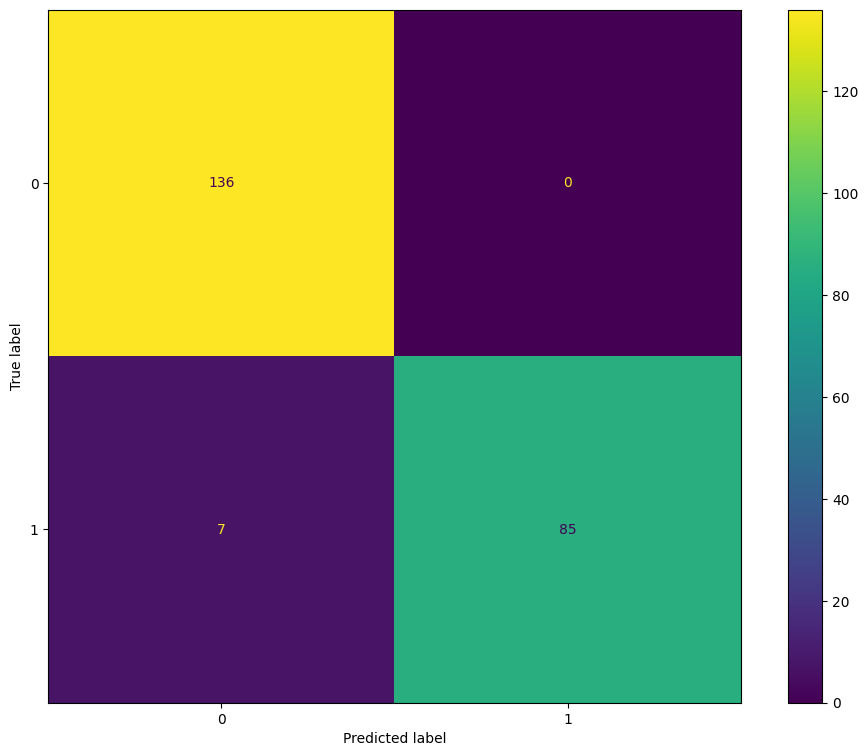

CPU times: total: 672 ms
Wall time: 666 ms


In [20]:
%%time
# CPU times: total: 656 ms
# Wall time: 672 ms

# dataset = pd.read_csv("audit_data/audit_clean_data.csv")
dataset = audit_class_df

cX = dataset.drop(['Risk'], axis=1)
cy = dataset['Risk']

X_train_org, x_test_org, Y_train, y_test = train_test_split(cX, cy, test_size = 0.30, random_state = 0)

x_train = X_train_org.values.tolist()
x_test = x_test_org.values.tolist()
y_train = Y_train.tolist()
y_test = y_test.tolist()

y_pred = KNNClassify(x_train, y_train, x_test, k=4, method='manhattan')

total_y_test = np.array(y_test)
total_y_pred = np.array(y_pred)
print("manhattan_distance")
display_accuracy(total_y_test, total_y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
display_confusion_matrix(total_y_test.astype(int), total_y_pred.astype(int))


y_pred = KNNClassify(x_train, y_train, x_test, k=4, method='euclidean')

total_y_test = np.array(y_test)
total_y_pred = np.array(y_pred)
print("euclidean_distance")
display_accuracy(total_y_test, total_y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
display_confusion_matrix(total_y_test.astype(int), total_y_pred.astype(int))

# Result 1

![plot](./imgs/P1A.PNG)
<br/>
![plot](./imgs/P1B.PNG)
<br/>
![plot](./imgs/P1C.PNG)



# PART2

In [21]:
def manhattanDistance(a, b, size):
  distance = 0
  for i in range(size):
    distance += math.fabs(a[i] - b[i])
  return distance

def sort_list(val, n):
  for i in range(len(val)):
    min = i
    for j in range(i+1, len(val)):
      if val[j] < val[min]:
        min = j
    val[i], val[min] = val[min], val[i]
  return val[:n]

def get_index(val, n):
  sort_value = sort_list(list(val.values()), n)
  index = []
  for i in range(len(val)):
    if val[i] in sort_value:
      index.append(i)
    if len(index) == n:
      break
  return index

def sort_distance_man(X, t, n):
  distance = {}
  for j in range(len(X)):
    distance[j] = manhattanDistance(X[j], t, len(X[j]))
  index = get_index(distance, n)
  return index

def get_y_value(y, index):
  total = 0
  for i in range(len(y)):
    if i in index:
      total += y[i]
  return total

def KNNRegressionpredict(X, y, T, n):
  total = []
  for i in range(len(T)):
    index = sort_distance_man(X, T[i], n)
    total.append((get_y_value(y, index)) / n)
  return total

DaysRents_df: (731, 15)
HourlyRents_df: (17379, 16)
Index(['rec_id', 'season', 'year', 'month', 'hour', 'is_holiday', 'weekday',
       'is_workingday', 'weather_condition', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')
Index(['id', 'season', 'Year', 'Month', 'holiday', 'weekday', 'workingday',
       'WeatherCondition', 'temp', 'FeelinTemp', 'Humidity', 'windspeed',
       'casual', 'registered', 'TotalRentDay'],
      dtype='object')


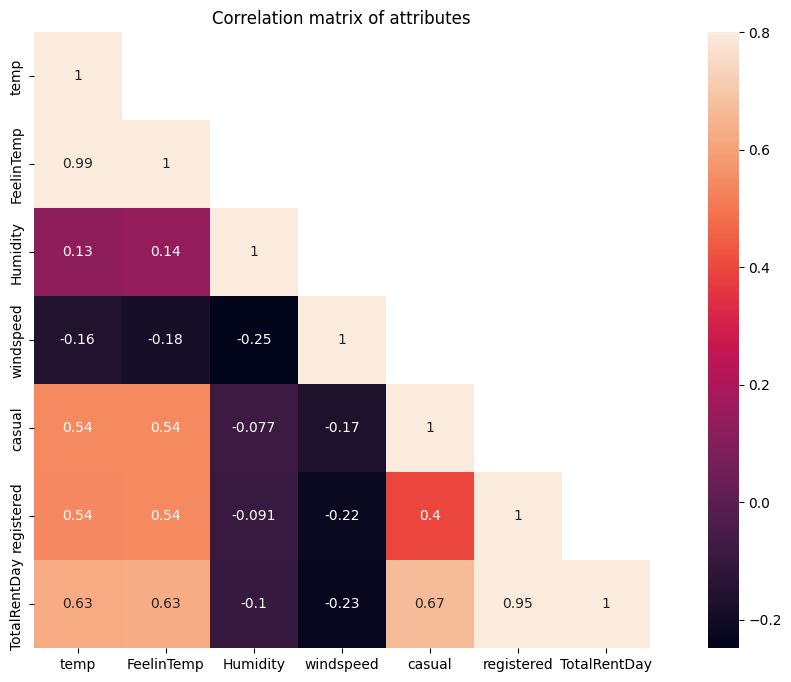

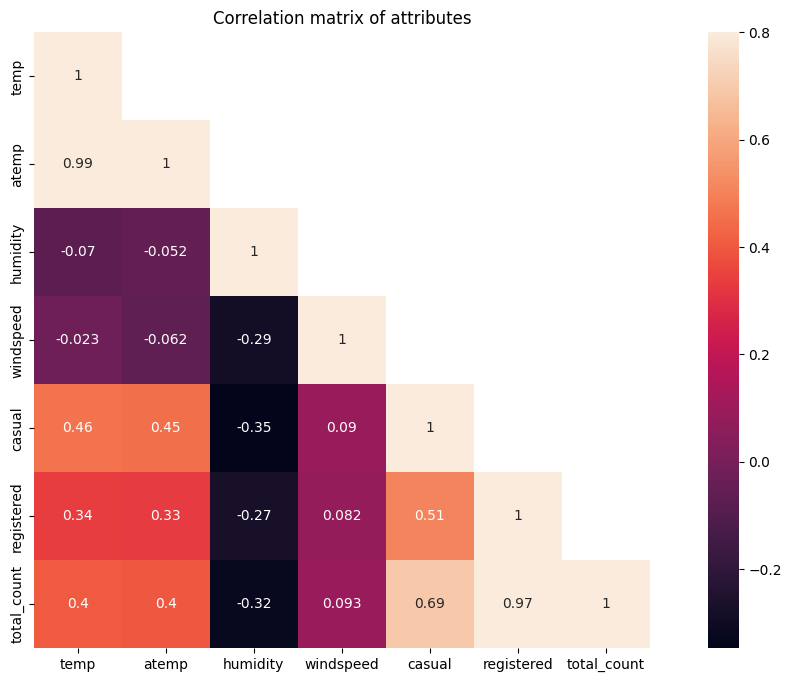

In [22]:
day_df = pd.read_csv('Bike-Sharing-Dataset/day.csv')
hour_df = pd.read_csv('Bike-Sharing-Dataset/hour.csv')

day_df.rename(columns={'instant':'id','dteday':'Date','yr':'Year','mnth':'Month',
                       'weathersit':'WeatherCondition','atemp':'FeelinTemp',
                       'hum':'Humidity','cnt':'TotalRentDay'},inplace=True)
# hour_df.rename(columns={'instant':'id','dteday':'Date','yr':'Year','mnth':'Month','hr':'Hours', 'weathersit':'WeatherCondition','atemp':'FeelinTemp','hum':'Humidity','cnt':'TotalRentHourly'},inplace=True)
hour_df.rename(columns={'instant':'rec_id','dteday':'datetime','holiday':'is_holiday',
                     'workingday':'is_workingday', 'weathersit':'weather_condition',
                     'hum':'humidity','mnth':'month', 'cnt':'total_count','hr':'hour',
                     'yr':'year'},inplace=True)

day_df['Date']=pd.to_datetime(day_df.Date)
day_df['season']=day_df.season.astype('category')
day_df['Year']=day_df.Year.astype('category')
day_df['Month']=day_df.Month.astype('category')
day_df['holiday']=day_df.holiday.astype('category')
day_df['weekday']=day_df.weekday.astype('category')
day_df['workingday']=day_df.workingday.astype('category')
day_df['WeatherCondition']=day_df.WeatherCondition.astype('category')
day_df = day_df.drop(['Date'], axis=1)

hour_df['datetime']=pd.to_datetime(hour_df.datetime)
hour_df['season']=hour_df.season.astype('category')
hour_df['year']=hour_df.year.astype('category')
hour_df['month']=hour_df.month.astype('category')
hour_df['hour']=hour_df.hour.astype('category')
hour_df['is_holiday']=hour_df.is_holiday.astype('category')
hour_df['weekday']=hour_df.weekday.astype('category')
hour_df['is_workingday']=hour_df.is_workingday.astype('category')
hour_df['weather_condition']=hour_df.weather_condition.astype('category')
hour_df = hour_df.drop(['datetime'], axis=1)

print("DaysRents_df: {}\nHourlyRents_df: {}".format(day_df.shape, hour_df.shape))
print(hour_df.columns)
print(day_df.columns)


correMtr=day_df[["temp","FeelinTemp","Humidity","windspeed","casual","registered","TotalRentDay"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

print()
print()

correMtr=hour_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()



In [23]:
%%time
# CPU times: total: 8.42 s
# Wall time: 8.47 s

dataset = hour_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]]
target = hour_df['total_count']

X_train, X_test, y_train, y_test = train_test_split(dataset,target,test_size=0.3,random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

knn = KNeighborsRegressor(n_neighbors = 4)
knn.fit(x_train, y_train) 

y_pred = knn.predict(x_test)
print ("Regression score is:",format(metrics.r2_score(y_test, y_pred),'.4f'), "for k_value:", 4)

k_range = range(1, 10)
k_scores = []
for k in k_range:
    knn_org = KNeighborsRegressor(n_neighbors=k)
    #obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn_org, x_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
    #append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

BestScore = [1 - x for x in k_scores]
best_k = k_range[BestScore.index(min(BestScore))]

classifier_org = KNeighborsRegressor(n_neighbors = best_k)
classifier_org.fit(x_train, y_train)
y_pred_org = classifier_org.predict(x_test)

print('Original Model')
print('\nn_neighbors:',str(best_k))
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test, y_pred_org)))
adjusted_r_squared = 1-(1-metrics.r2_score(y_test,y_pred_org))*(len(target)-1)/(len(target)-dataset.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_pred_org)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, y_pred_org)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_org))))  


Regression score is: 0.9939 for k_value: 4
Original Model

n_neighbors: 9

R2: 0.99
Adj_R2: 0.99
Mean Absolute Error: 9.61
Mean Squared Error: 185.06
Root Mean Squared Error: 13.60
CPU times: total: 2.61 s
Wall time: 2.62 s


# Result 2

![plot](./imgs/P2A.PNG)


# PART 3

Original Model


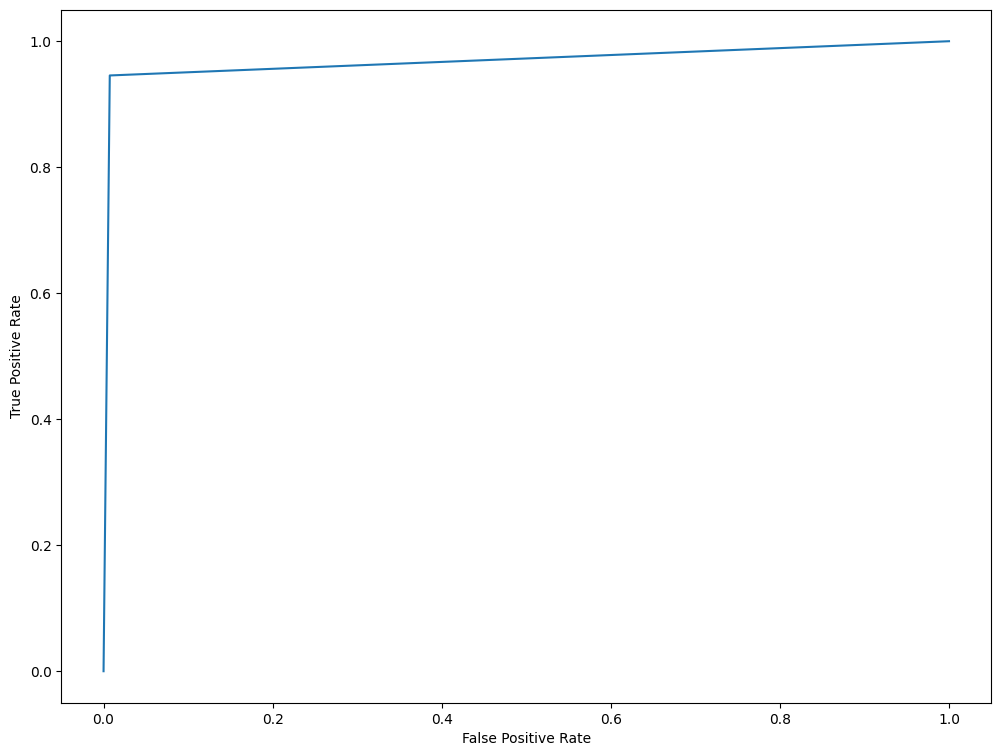

[2. 1. 0.]
Accuracy : % 97.36842105263158
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       136
         1.0       0.99      0.95      0.97        92

    accuracy                           0.97       228
   macro avg       0.98      0.97      0.97       228
weighted avg       0.97      0.97      0.97       228

CPU times: total: 109 ms
Wall time: 99.3 ms


In [24]:
%%time
# CPU times: user 1min 3s, sys: 215 ms, total: 1min 3s
# Wall time: 1min 6s


dataset = audit_class_df.drop(['Risk'], axis=1)
target = audit_class_df['Risk']


# dataset = np.array_split(dataset, 2)[0]
# target = np.array_split(target, 2)[0]

X_train_org, x_test_org, Y_train, y_test = train_test_split(dataset,target,test_size=0.3,random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(x_test_org)

svc = SVC(kernel='linear',gamma='scale')  
svc.fit(X_train, Y_train) 
y_pred = svc.predict(X_test)  

display_roc(y_test, y_pred)
display_accuracy(y_test, y_pred)
report_performance(y_test, y_pred)

# Result 3

![plot](./imgs/P3A.PNG)


# PART 4

In [25]:
%%time
# CPU times: total: 23.5 s
# Wall time: 23.6 s

dataset = hour_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]]
target = hour_df['total_count']

dataset = np.array_split(dataset, 2)[0]
target = np.array_split(target, 2)[0]

X_train, X_test, y_train, y_test = train_test_split(dataset,target,test_size=0.3,random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

svr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(x_train, y_train)

y_pred = svr.predict(x_test)
print ("Regression score is:",format(metrics.r2_score(y_test, y_pred),'.4f'))


Regression score is: 0.9999
CPU times: total: 1min
Wall time: 1min 1s


In [26]:
%%time
# CPU times: total: 4min 14s
# Wall time: 4min 18s

dataset = hour_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]]
target = hour_df['total_count']

dataset = np.array_split(dataset, 2)[0]
target = np.array_split(target, 2)[0]

kf = KFold(n_splits=5, shuffle=True, random_state=0)

train_scores = []
test_scores = []

svr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)

sc = StandardScaler()

for train_index, test_index in kf.split(dataset):
    X_train, X_test = dataset.iloc[train_index], dataset.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    x_train = sc.fit_transform(X_train)
    x_test = sc.transform(X_test)
    
    svr.fit(x_train, y_train)
    
    y_train_pred = svr.predict(x_train)
    y_test_pred = svr.predict(x_test)
    
    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_test, y_test_pred)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
mean_train_score = np.mean(train_scores)
std_train_score = np.std(train_scores)
mean_test_score = np.mean(test_scores)
std_test_score = np.std(test_scores)

print('SVR Regression Score (mean) for train set:', format(mean_train_score, '.4f'), ', Standard deviation for train set:', format(std_train_score, '.4f'))
print('SVR Regression Score (mean) for test set:', format(mean_test_score, '.4f'), ', Standard deviation for test set:', format(std_test_score, '.4f'))


SVR Regression Score (mean) for train set: 1.0000 , Standard deviation for train set: 0.0000
SVR Regression Score (mean) for test set: 1.0000 , Standard deviation for test set: 0.0000
CPU times: total: 8min 24s
Wall time: 8min 33s


# Result 4

![plot](./imgs/P4A.PNG)
<br/>
![plot](./imgs/P4B.PNG)



# PART 5

Accuracy: 0.7192982456140351
Original Model


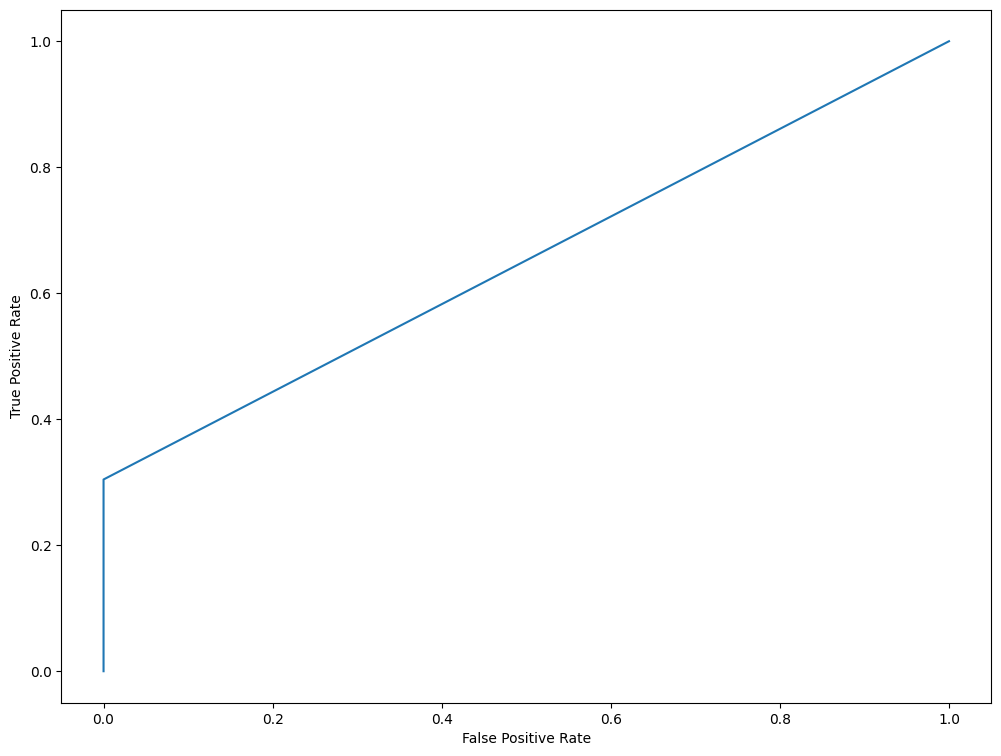

[2. 1. 0.]
              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81       136
         1.0       1.00      0.30      0.47        92

    accuracy                           0.72       228
   macro avg       0.84      0.65      0.64       228
weighted avg       0.81      0.72      0.67       228



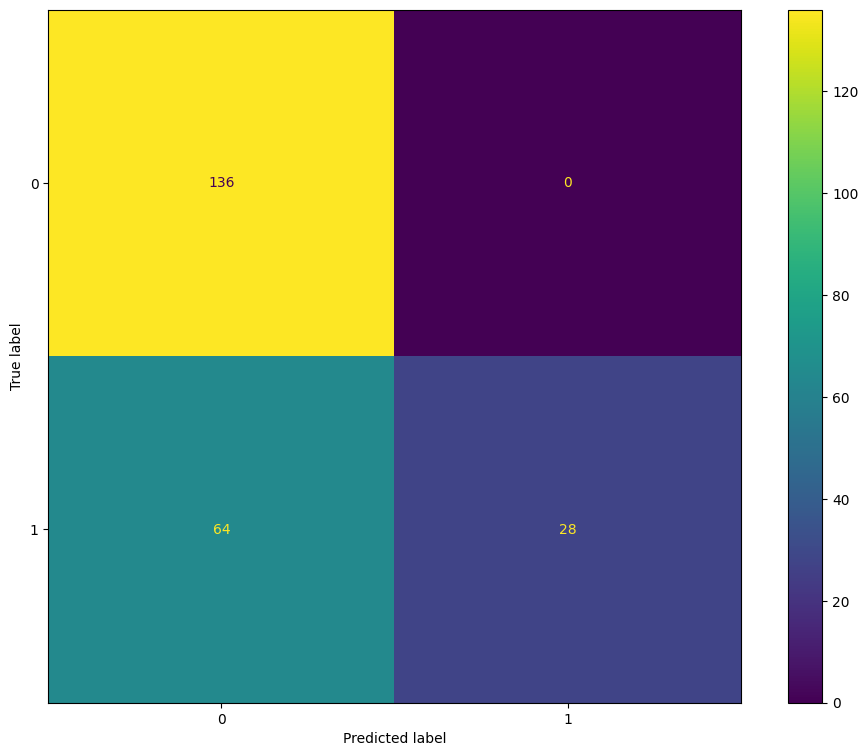

In [27]:
dataset = audit_class_df

cX = dataset.drop(['Risk'], axis=1)
cy = dataset['Risk']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cX, cy, test_size=0.3, random_state=42)

# Train a polynomial kernel SVM model
svm_model = SVC(kernel='poly', degree=3)
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
display_roc(y_test, y_pred)
report_performance(y_test, y_pred)
display_confusion_matrix(y_test, y_pred)


# Result 5


![plot](./imgs/P5A.PNG)
<br/>
![plot](./imgs/P5B.PNG)

# PART 6

In [28]:
def tree_to_rules(tree, feature_names):
 
    rules = []
    def traverse(node_id, current_rule):
        feature_index = tree.tree_.feature[node_id]
        threshold = tree.tree_.threshold[node_id]
        feature_name = feature_names[feature_index]
        
        if tree.tree_.children_left[node_id] == tree.tree_.children_right[node_id]:
            class_label = np.argmax(tree.tree_.value[node_id][0])
            rules.append((current_rule, class_label))
            return
        
        left_rule = current_rule + [(feature_name, "<=", threshold)]
        traverse(tree.tree_.children_left[node_id], left_rule)
        right_rule = current_rule + [(feature_name, ">", threshold)]
        traverse(tree.tree_.children_right[node_id], right_rule)
    
    traverse(0, [])
    return rules


Pre-pruning Accuracy: 0.9078947368421053
Accuracy: 0.9078947368421053
Precision: 0.9615384615384616
Recall: 0.8064516129032258
F1 score: 0.8771929824561403


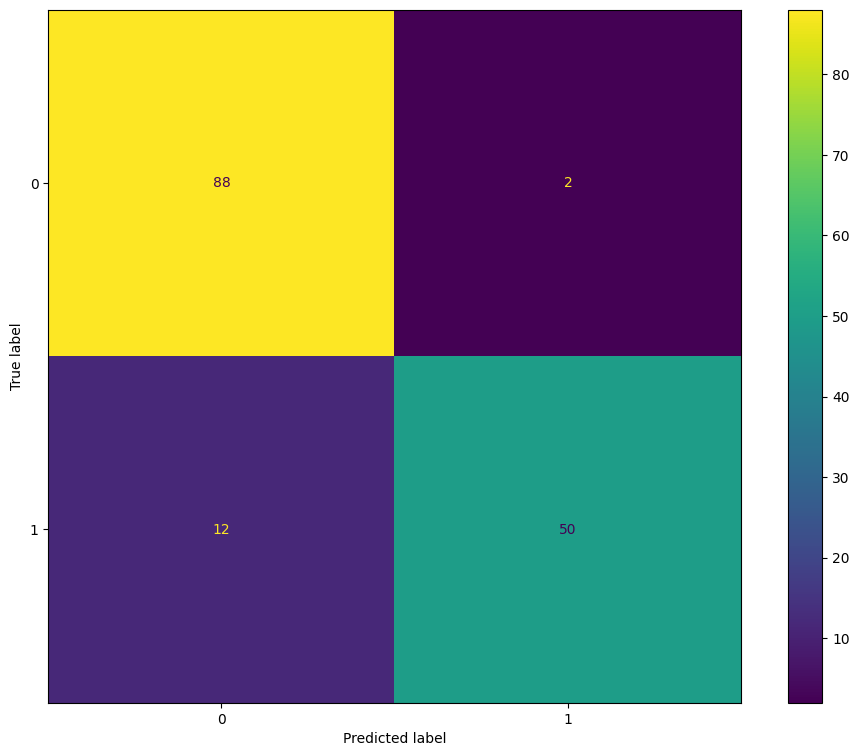



Post-pruning Accuracy: 0.5921052631578947
Accuracy: 0.5921052631578947
Precision: 0.0
Recall: 0.0
F1 score: 0.0


C:\Users\kral_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


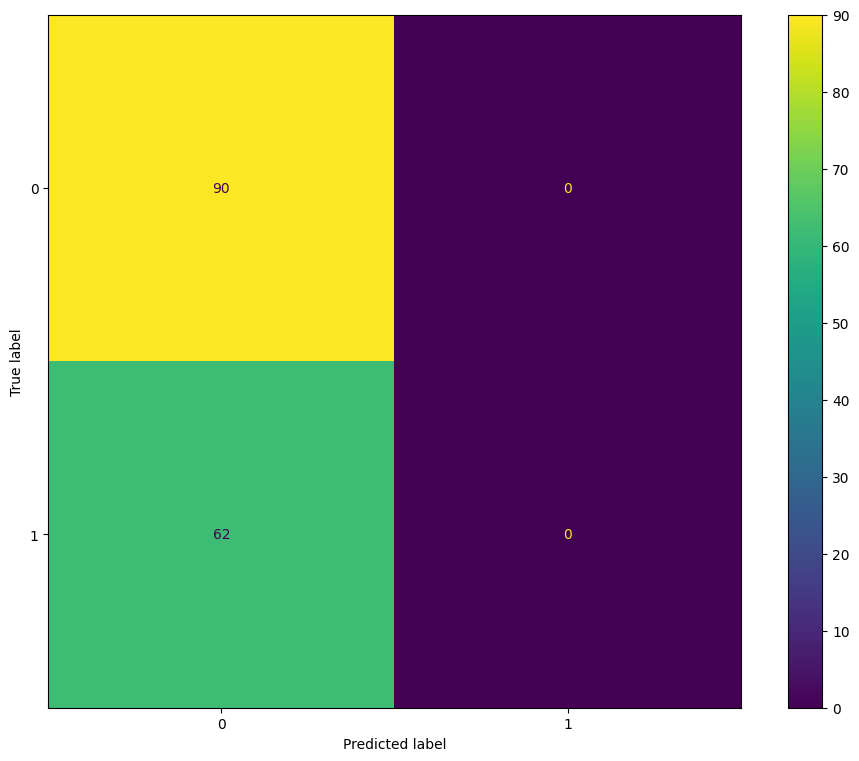

In [29]:
dataset = audit_class_df

cX = dataset.drop(['Risk'], axis=1)
cy = dataset['Risk']

X_train, X_test, y_train, y_test = train_test_split(cX, cy, test_size=0.2, random_state=42)

print()
# Pre-pruning
clf_pre = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)
clf_pre.fit(X_train, y_train)
y_pred = clf_pre.predict(X_test)
print("Pre-pruning Accuracy:", accuracy_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
display_confusion_matrix(y_test.astype(int), y_pred.astype(int))

print()

print()
# Post-pruning
clf_post = DecisionTreeClassifier(random_state=42)
clf_post.fit(X_train, y_train)
path = clf_post.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
y_pred_post = clfs[-1].predict(X_test)
print("Post-pruning Accuracy:", accuracy_score(y_test, y_pred_post))

print("Accuracy:", accuracy_score(y_test, y_pred_post))
print("Precision:", precision_score(y_test, y_pred_post))
print("Recall:", recall_score(y_test, y_pred_post))
print("F1 score:", f1_score(y_test, y_pred_post))
display_confusion_matrix(y_test.astype(int), y_pred_post.astype(int))


In [30]:

dataset = audit_class_df
X = dataset.drop(['Risk'], axis=1)
y = dataset['Risk']

feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

rules = tree_to_rules(clf, feature_names)
for rule in rules:
    print(rule)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

([('Score', '<=', 2.3000000715255737)], 0)
([('Score', '>', 2.3000000715255737), ('Risk_D', '<=', 0.4220000058412552), ('CONTROL_RISK', '<=', 0.6000000089406967), ('Risk_A', '<=', 3.615000009536743), ('Risk_B', '<=', 3.294000029563904), ('Score', '<=', 3.5), ('Risk_B', '<=', 2.61899995803833)], 0)
([('Score', '>', 2.3000000715255737), ('Risk_D', '<=', 0.4220000058412552), ('CONTROL_RISK', '<=', 0.6000000089406967), ('Risk_A', '<=', 3.615000009536743), ('Risk_B', '<=', 3.294000029563904), ('Score', '<=', 3.5), ('Risk_B', '>', 2.61899995803833), ('Score', '<=', 3.100000023841858)], 1)
([('Score', '>', 2.3000000715255737), ('Risk_D', '<=', 0.4220000058412552), ('CONTROL_RISK', '<=', 0.6000000089406967), ('Risk_A', '<=', 3.615000009536743), ('Risk_B', '<=', 3.294000029563904), ('Score', '<=', 3.5), ('Risk_B', '>', 2.61899995803833), ('Score', '>', 3.100000023841858)], 0)
([('Score', '>', 2.3000000715255737), ('Risk_D', '<=', 0.4220000058412552), ('CONTROL_RISK', '<=', 0.6000000089406967), 

# Result 6


![plot](./imgs/P6A.PNG)
<br/>
![plot](./imgs/P6B.PNG)
<br/>
![plot](./imgs/P6C.PNG)


# PART 7

In [31]:

X = hour_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]]
y = hour_df['total_count']

X = np.array_split(X, 2)[0]
y = np.array_split(y, 2)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9735327963176065
Precision: 0.9731396240889911
Recall: 0.9735327963176065
F1 score: 0.9720779220779221


C:\Users\kral_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kral_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Result 7

<br/>

![plot](./imgs/P7A.PNG)
